In [1]:
%cd ..


/Users/eliaweiss/ai/segmentation/MobileSAM


In [2]:
import numpy as np
from tblDetect.TableDetect import TableDetect
from tblDetect.MobileSamBoxes import MobileSamBoxes
import matplotlib.pyplot as plt
from PIL import Image
from notebooks.Utils import plot_results, \
    plot_rotatedResult, \
        applyRotatedResult , \
        plot_annotations 
from tblDetect.AlignTable_Processor import AlignTable_Processor
from tblDetect.TblStructureDetect import TblStructureDetect
import cv2

/Users/eliaweiss/ai/segmentation/MobileSAM/tinyvit/tiny_vit.py:656: UserWarning: Overwriting tiny_vit_5m_224 in registry with tinyvit.tiny_vit.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/Users/eliaweiss/ai/segmentation/MobileSAM/tinyvit/tiny_vit.py:656: UserWarning: Overwriting tiny_vit_11m_224 in registry with tinyvit.tiny_vit.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/Users/eliaweiss/ai/segmentation/MobileSAM/tinyvit/tiny_vit.py:656: UserWarning: Overwriting tiny_vit_21m_224 in registry with tinyvit.tiny_vit.tiny_vit_21m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/Users/eliaweiss/ai/segmentation/MobileSAM/tinyvit/tiny_vit.py:656: U

In [3]:
# init detectors
tblDec = TableDetect()
sam = MobileSamBoxes()
tblStructDetect = TblStructureDetect()       

checkpoint_load_scucess


In [4]:
file_list = ["/Users/eliaweiss/Documents/doc2txt/invoices 2/expense (6).jpeg", 
              "/Users/eliaweiss/Documents/doc2txt/sihach/attachments/img/20231025012642_001.jpg",
              "/Users/eliaweiss/Documents/doc2txt/sihach/need fix/4e7d4235deff4ee2b72d886e12ad0bcf.jpg"]

In [9]:
import os
folder = "/Users/eliaweiss/Documents/doc2txt/lineCv/1"
folder = "/Users/eliaweiss/Documents/doc2txt/sihach/Invoices/2/img2"
file_list = os.listdir(folder)
file_list = [file for file in file_list if 
             ".jpg" in file 
             or ".png" in file 
             or ".jpeg" in file]


In [10]:
fileIter = iter(file_list)
cc = 0

# align table

In [11]:
while True:
    file_path = next(fileIter)
    cc+=1    
    if cc < 3:
        continue
    print(cc)
    
    file_path = os.path.join(folder, file_path)
    print(file_path)

    img_pil = Image.open(file_path)
    # Resize the image
    img_pil.thumbnail((1500, 1500))
    # detect table
    probas, boxes = tblDec.detectTables(img_pil)
    if len(boxes):
        # find table mask
        anns = sam.process(img_pil,boxes)
    else:
        print("no tbl found!")
        anns = []
    

    tmpImg = np.array(img_pil)

    # if True:
    #     for box in boxes:
    #         alignTable_processor = AlignTable_Processor(img_pil, cropBBox=np.intp(box.tolist()))
    #         tbl_patch_pil = alignTable_processor.getAlignTable()
    #         cells = tblStructDetect.detectTableStructure(tbl_patch_pil)
    #         rotated_cells =  alignTable_processor.unRotateAllCell(cells)
    #         applyRotatedResult(tmpImg, rotated_cells)        
    # else:    
    for ann, box, prob in zip(anns, boxes,probas):
        print("prob: ",f"{prob:.2}")
        alignTable_processor = AlignTable_Processor(img_pil, annotation=ann, tblBox=np.intp(box.tolist()))
        tbl_patch_pil = alignTable_processor.getAlignTable()
        cells = tblStructDetect.detectTableStructure(tbl_patch_pil)
        rotated_cells =  alignTable_processor.unRotateAllCell(cells)
        applyRotatedResult(tmpImg, rotated_cells)
    
        cv2.imshow("tmpImg",tmpImg)
        cv2.waitKey()
    # break

3
/Users/eliaweiss/Documents/doc2txt/sihach/Invoices/2/img2/4.jpg
shape (1500, 1061, 3)
------ total time: (s): 1.67
prob:  0.25
self.hog_shape (149, 934)
self.main_shape (149, 934)
final lines: 47
4
/Users/eliaweiss/Documents/doc2txt/sihach/Invoices/2/img2/5.jpg
shape (1500, 1061, 3)
------ total time: (s): 1.54
prob:  0.55
self.hog_shape (260, 937)
self.main_shape (260, 937)
final lines: 101


In [8]:
prob

tensor(0.2457)

In [ ]:
tblDec.detectTables(img_pil)

AttributeError: 'list' object has no attribute 'unbind'

In [ ]:
f"{prob[0]:.2}"

'0.13'

In [ ]:
probas[:, 0]



tensor([0.2457, 0.1325])

In [ ]:

# Choose an appropriate IoU threshold (common values are 0.4 or 0.5)
iou_threshold = 0.1

# Apply NMS to suppress overlapping bounding boxes
indices = non_max_suppression(boxes, probas[:, 0], iou_threshold)

# Extract the final boxes after NMS
final_boxes = [boxes[i] for i in indices]
print(final_boxes)
final_probas = [probas[i,0] for i in indices]
print(final_probas)

[tensor([ 73.0146, 431.2457, 962.9144, 544.9206])]
[tensor(0.2457)]


In [ ]:
def non_max_suppression(boxes, scores, threshold):
    """
    Perform Non-Maximum Suppression to remove overlapping bounding boxes.
    
    Args:
    - boxes: A list of bounding box coordinates in the format [x_min, y_min, x_max, y_max].
    - scores: A list of confidence scores corresponding to each bounding box.
    - threshold: IoU (Intersection over Union) threshold to determine overlapping boxes.
    
    Returns:
    - selected_indices: A list of indices corresponding to the selected bounding boxes.
    """
    selected_indices = []
    
    # Sort boxes based on their scores in descending order
    sorted_indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)
    
    while sorted_indices:
        # Select the bounding box with the highest score
        selected_index = sorted_indices[0]
        selected_indices.append(selected_index)
        
        # Compute IoU between the selected box and other boxes
        selected_box = boxes[selected_index]
        other_boxes = [boxes[i] for i in sorted_indices[1:]]
        ious = [calculate_iou(selected_box, other_box) for other_box in other_boxes]
        
        # Remove boxes with IoU greater than the threshold
        filtered_indices = [i for i, iou in enumerate(ious) if iou <= threshold]
        sorted_indices = [sorted_indices[i + 1] for i in filtered_indices]
    
    return selected_indices

def calculate_iou(box1, box2):
    """
    Calculate the Intersection over Union (IoU) between two bounding boxes.
    
    Args:
    - box1, box2: Bounding box coordinates in the format [x_min, y_min, x_max, y_max].
    
    Returns:
    - iou: Intersection over Union (IoU) value.
    """
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    
    intersection = max(0, x2 - x1) * max(0, y2 - y1)
    
    area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    
    union = area1 + area2 - intersection
    
    iou = intersection / union if union > 0 else 0
    
    return iou


In [ ]:
alignTable_processor = AlignTable_Processor(img_pil, annotation=ann, tblBox=np.intp(box.tolist()))
tbl_patch_pil = alignTable_processor.getAlignTable()
cells = tblStructDetect.detectTableStructure(tbl_patch_pil)
rotated_cells =  alignTable_processor.unRotateAllCell(cells)
applyRotatedResult(tmpImg, rotated_cells)        

self.hog_shape (89, 655)
self.main_shape (89, 655)
final lines: 6


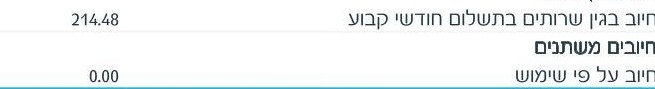

In [ ]:
Image.fromarray(alignTable_processor.tbl_patch)

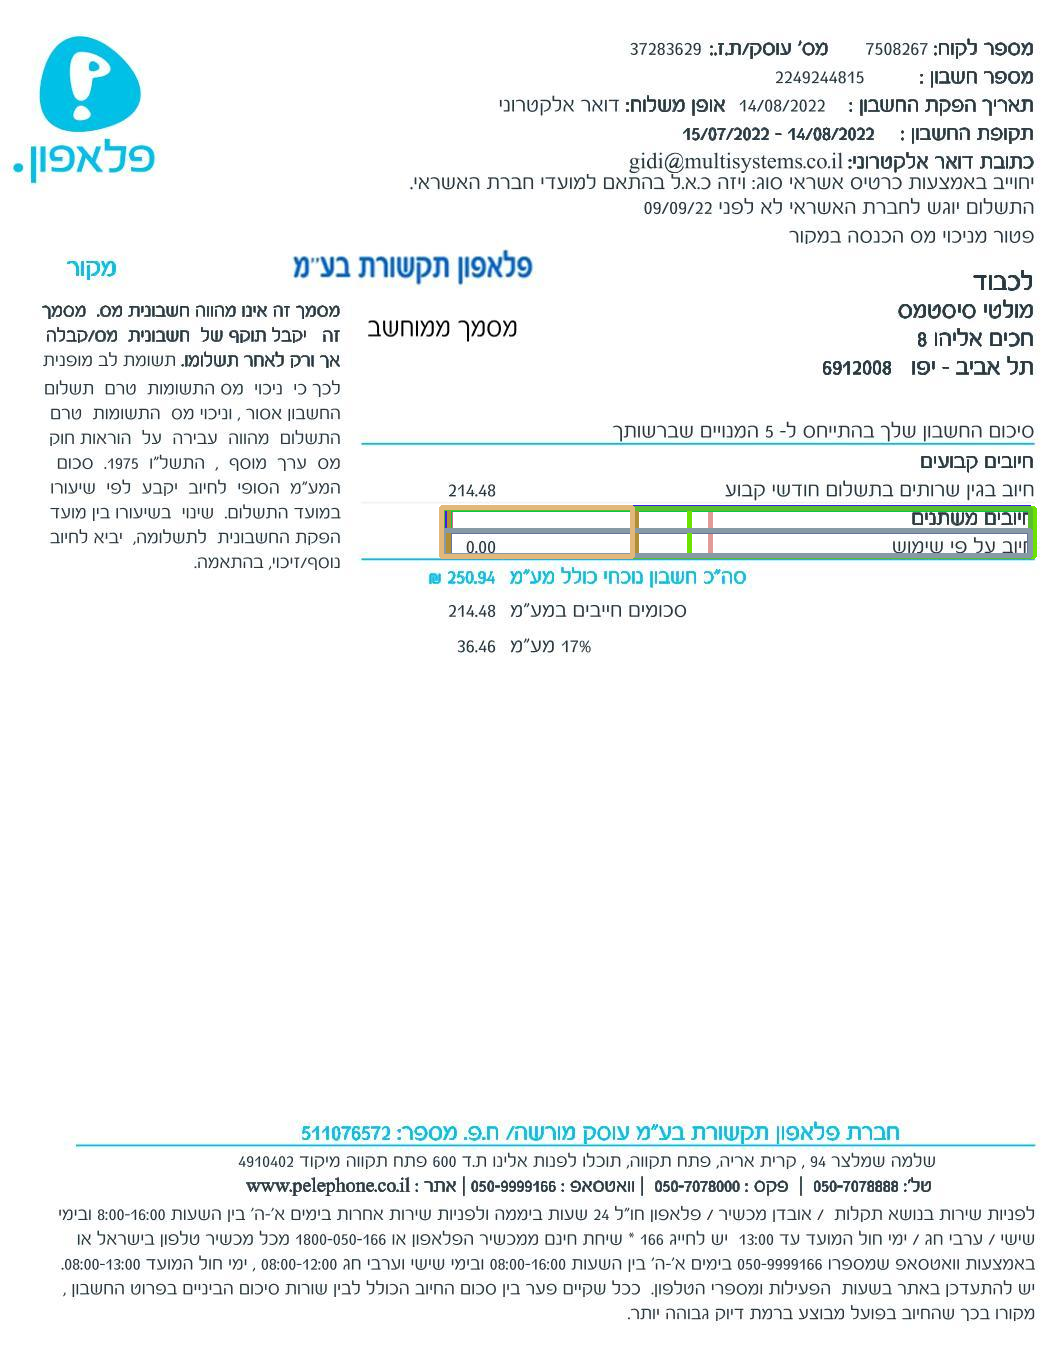

In [ ]:
Image.fromarray(tmpImg)

In [ ]:
for ann in anns:
    alignTable_processor = AlignTable_Processor(img_pil, annotation=ann)
    tbl_patch_pil = alignTable_processor.getAlignTable()
    cells = tblStructDetect.detectTableStructure(tbl_patch_pil)
    rotated_cells =  alignTable_processor.unRotateAllCell(cells)
    applyRotatedResult(tmpImg, rotated_cells)
    cv2.imshow("tmpImg",tmpImg)
    cv2.waitKey()    

self.hog_shape (116, 671)
self.main_shape (116, 671)
final lines: 10


KeyboardInterrupt: 

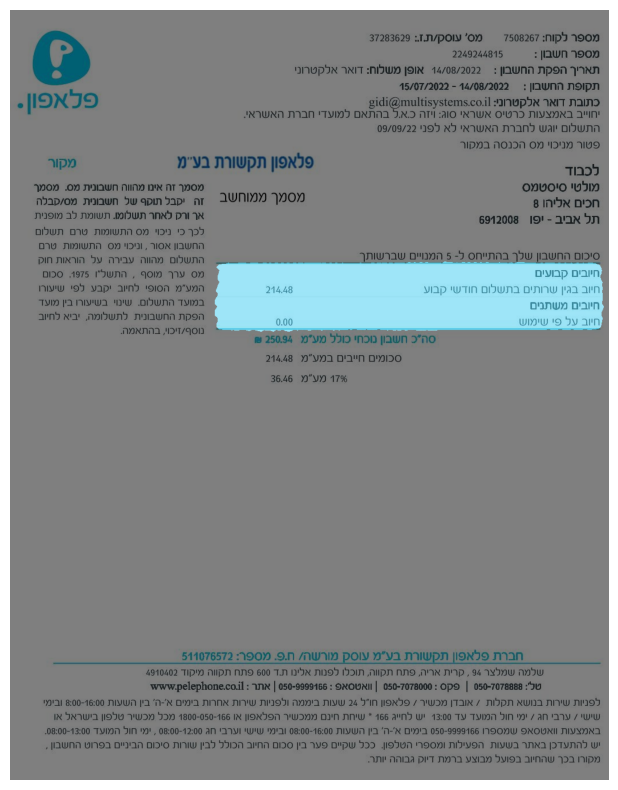

In [ ]:
# def plot_annotations(img_pil, anns):
#     imgTmp = np.zeros((anns.shape[1], anns.shape[2], 3), dtype=np.uint8)
#     for ann in range(anns.shape[0]):
#         m = anns[ann].bool()
#         m=m.cpu().numpy()
#         color_mask = np.int0(np.random.random(3)*255)
#         imgTmp[m] = color_mask

#     background =  img_pil.convert("RGBA")
#     imgTmp = Image.fromarray(imgTmp).convert("RGBA")
#     pil_img = Image.blend(background, imgTmp, 0.5)            
#     plt.figure(figsize=(16,10))
#     plt.imshow(pil_img)
#     plt.axis('off')
#     plt.show() 

plot_annotations(img_pil, anns)    

     



In [ ]:
def applyLineSegment(mask, line, color=255):
    for i, ls in enumerate(line):
        left, bottom, right, top = ls.boundingBox
        if ls.patch is not None:
            for y in range(bottom, top):
                for x in range(left, right):
                    if ls.patch[y-bottom, x-left] > 0:
                        mask[y, x] = color
        elif ls.patch is None:
            mask[bottom:top, left:right] = color

116 <class 'lineVision.lineCv.line.LineCv_HogLine.LineCv_HogLine'>


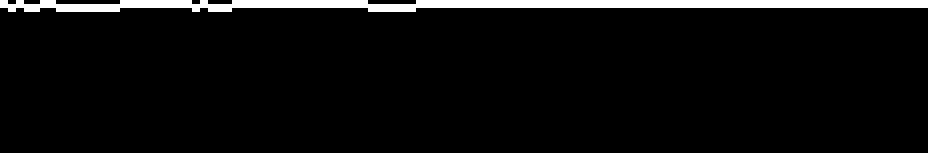

In [ ]:
mask = np.zeros(alignTable_processor.cvProcessor.imgZv.hog_shape, np.uint8)
for line in alignTable_processor.lines[:5]:
    print(len(line), type(line.parentLine))
    applyLineSegment(mask, line, color=(255))
    
Image.fromarray(mask)  

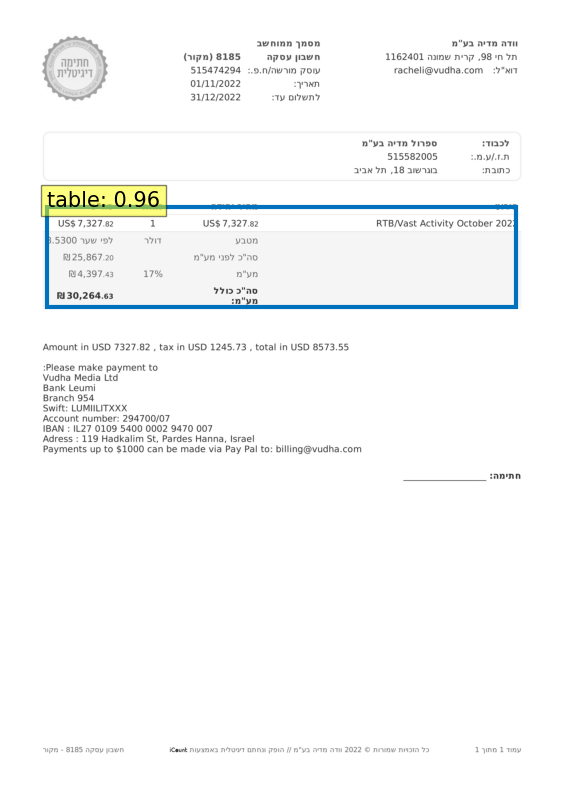

In [ ]:
# probas, boxes = tblDec.detectTables(img)

plot_results(tblDec.model, img_pil, probas, boxes)
